In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt


def readFile():
    with open('./dist.all.last.txt') as distFile:
        reader = csv.reader(distFile, delimiter="\t")
        Ln = list(zip(*reader))[0]
    return (Ln)

In [2]:
def halfNames(LastNames, i):
    if i == None:
        NamesUsed = np.random.choice(
            LastNames, (len(LastNames) // 2), replace=False)
    else:
        NamesUsed = np.random.choice(LastNames, i, replace=False)
    return (NamesUsed)

In [3]:
def f(xi, a):
    if a == None:
        return (ord(xi) - 96)
    else:
        return ((ord(xi) - 96) * a)

In [4]:
def h1(x, l):
    return (sum(f(xi, None) for xi in x.lower()) % l)


def h2(x, l):
    return (sum(f(xi, random.randint(1, l - 1)) for xi in x.lower()) % l)


def fillh1(Names, l):
    tableh1 = [[] for i in range(l)]
    for name in Names:
        tableh1[h1(name, l)].append(name)
    return (tableh1)


def fillh2(Names, l):
    tableh2 = [[] for i in range(l)]
    for name in Names:
        tableh2[h2(name, l)].append(name)
    return (tableh2)

In [5]:
def binData(table, bins):
    data = [len(x) for x in table]
    bD = list()
    for i, j in enumerate(bins):
        if i == len(bins) - 1:
            bD.append(sum(data[bins[i]:]))
        else:
            bD.append(sum(data[bins[i]:bins[i + 1]]))
    return (bD)

In [6]:
def histogramPlot(tableh1, tableh2):
    binsh1 = np.arange(0, 351, 50)
    binsh2 = np.arange(0, 5701, 570)
    datah1 = binData(tableh1, binsh1)
    datah2 = binData(tableh2, binsh2)
    f, ax = plt.subplots(1, 2, sharey=True)
    ax[0].bar(binsh1, datah1, width=50)
    ax[1].bar(binsh2, datah2, width=570)

    ax[0].set(
        xlabel='Groups of 50 Hash Table Indicies',
        ylabel='Number of Collisions',
        title=r'$h_1(x)$')
    ax[1].set(
        xlabel='Groups of 570 Hash Table Indicies',
        ylabel='Number of Collisions',
        title=r'$h_2(x)$')
    plt.show()

In [7]:
def chainh(data, hx, l):
    if hx == 1:
        table = list()
        for i in data:
            j = fillh1(i, l)
            c = list()
            for k in j:
                c.append(len(k))
            table.append(max(c))
        return (table)
    elif hx == 2:
        table = list()
        for i in data:
            j = fillh2(i, l)
            c = list()
            for k in j:
                c.append(len(k))
            table.append(max(c))
        return (table)

In [8]:
def chain(LastNames):
    l = 5701
    nSize = np.arange(.1, 1.01, .1)
    nSizeA = [int(88799 * np.float64(i).item()) for i in nSize]
    data = list()
    for i in nSizeA:
        data.append(halfNames(LastNames, i))
    chainh1 = chainh(data, 1, l)
    chainh2 = chainh(data, 2, l)

    f, ax = plt.subplots(1, 2, sharey=False)
    ax[0].plot(range(0, 100, 10), chainh1)
    ax[1].plot(range(0, 100, 10), chainh2)
    ax[0].set(
        xlabel='% of the Text File',
        ylabel='Maximum Size of Chain',
        title=r'$h_1(x)$`s Maximum Chain Values')
    ax[1].set(
        xlabel='% of the Text File',
        ylabel='Maximum Size of Chain',
        title=r'$h_2(x)$`s Maximum Chain Values')
    plt.show()

In [9]:
def collisionL(LastNames):
    p = [
        127, 229, 503, 1049, 1777, 2161, 3539, 4643, 5701, 6827, 7687, 8807,
        10067, 15373, 20123, 34819
    ]
    datah1 = list()
    datah2 = list()
    HalfNames = halfNames(LastNames, None)

    for i in p:
        x = fillh1(LastNames, i)
        y = fillh2(LastNames, i)
        c1 = list()
        c2 = list()
        for j in x:
            c1.append(len(j))
        for j in y:
            c2.append(len(j))
        datah1.append(max(c1))
        datah2.append(max(c2))

    f, ax = plt.subplots(1, 2, sharey=False, sharex=True)
    ax[0].plot(p, datah1)
    ax[1].plot(p, datah2)
    ax[0].set(
        xlabel=r'Value of $\ell$',
        ylabel='Maximum Number of Collisions',
        title=r'$h_1(x)$`s Maximum Number of Collisions per $\ell$')
    ax[1].set(
        xlabel=r'Value of $\ell$',
        ylabel='Maximum Number of Collisions',
        title=r'$h_2(x)$`s Maximum Number of Collisions per $\ell$')
    plt.show()

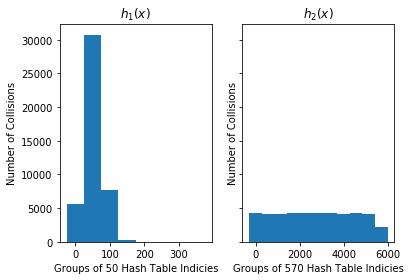

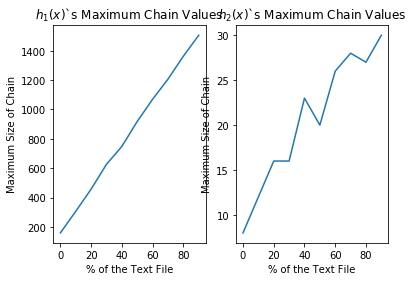

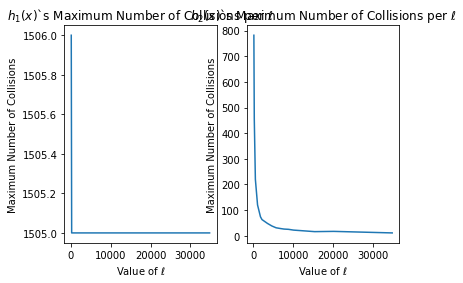

In [10]:
def main():
    # Part a,b
    LastNames = readFile()
    l = 5987
    HalfNames = halfNames(LastNames, None)
    tableh1 = fillh1(HalfNames, l)
    tableh2 = fillh2(HalfNames, l)
    histogramPlot(tableh1, tableh2)

    #Part d
    chain(LastNames)
    collisionL(LastNames)


if __name__ == "__main__":
    main()